## Pip Installs and Imports

In [1]:
! pip install convokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.2/183.2 kB 3.3 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 3.3 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.3 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 6.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 2.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 14.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━

In [2]:
! pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.1 MB/s eta 0:00:00ta 0:00:01


In [1]:
from convokit import Corpus, download
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ucloud/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/ucloud/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ucloud/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Explorative Data Anlyses

In [5]:
corpus = Corpus(filename=download("movie-corpus"))

In [6]:
corpus.print_summary_stats()

Number of Speakers: 9035
Number of Utterances: 304713
Number of Conversations: 83097


In [7]:
utterances = corpus.get_utterances_dataframe()

In [8]:
utterances.head()

,timestamp,text,speaker,reply_to,conversation_id,meta.movie_id,meta.parsed,vectors
id,,,,,,,,
L1045,None,They do not!,u0,L1044,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[]
L1044,None,They do to!,u2,None,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[]
L985,None,I hope so.,u0,L984,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'I', 'tag': 'PRP',...",[]
L984,None,She okay?,u2,None,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'She', 'tag': 'PRP...",[]
L925,None,Let's go.,u0,L924,L924,m0,"[{'rt': 0, 'toks': [{'tok': 'Let', 'tag': 'VB'...",[]


In [9]:
utterances.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304713 entries, L1045 to L666256
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   timestamp        0 non-null       object
 1   text             304713 non-null  object
 2   speaker          304713 non-null  object
 3   reply_to         221616 non-null  object
 4   conversation_id  304713 non-null  object
 5   meta.movie_id    304713 non-null  object
 6   meta.parsed      304713 non-null  object
 7   vectors          304713 non-null  object
dtypes: object(8)
memory usage: 20.9+ MB


In [10]:
conversations = corpus.get_conversations_dataframe()

In [11]:
conversations.head()

,vectors,meta.movie_idx,meta.movie_name,meta.release_year,meta.rating,meta.votes,meta.genre
id,,,,,,,
L1044,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L984,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L924,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L870,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L866,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"


In [12]:
conversations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83097 entries, L1044 to L666256
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   vectors            83097 non-null  object
 1   meta.movie_idx     83097 non-null  object
 2   meta.movie_name    83097 non-null  object
 3   meta.release_year  83097 non-null  object
 4   meta.rating        83097 non-null  object
 5   meta.votes         83097 non-null  object
 6   meta.genre         83097 non-null  object
dtypes: object(7)
memory usage: 5.1+ MB


In [13]:
conversations.describe()

,vectors,meta.movie_idx,meta.movie_name,meta.release_year,meta.rating,meta.votes,meta.genre
count,83097,83097,83097,83097,83097,83097,83097
unique,1,617,617,88,62,614,290
top,[],m289,casino,1999,7.20,111223,['drama']
freq,83097,338,338,6646,3694,338,5027


In [14]:
characters = corpus.get_speakers_dataframe()

In [15]:
characters.head()

,vectors,meta.character_name,meta.movie_idx,meta.movie_name,meta.gender,meta.credit_pos
id,,,,,,
u0,[],BIANCA,m0,10 things i hate about you,f,4
u2,[],CAMERON,m0,10 things i hate about you,m,3
u3,[],CHASTITY,m0,10 things i hate about you,?,?
u4,[],JOEY,m0,10 things i hate about you,m,6
u5,[],KAT,m0,10 things i hate about you,f,2


In [ ]:
characters['meta.gender'].value_counts()

In [16]:
# Clean the gender column
characters['meta.gender'] = characters['meta.gender'].str.lower()


In [17]:
characters['meta.gender'].value_counts()

meta.gender
?    6020
m    2049
f     966
Name: count, dtype: int64

## Merge the Dataframes

In [18]:
# Merge the DataFrames on 'conversation_id' from utterances and 'id' from conversations
merged_df = pd.merge(utterances, conversations, left_on='conversation_id', right_on='id', suffixes=('_utterance', '_conversation'))
merged_df.head()

,timestamp,text,speaker,reply_to,conversation_id,meta.movie_id,meta.parsed,vectors_utterance,vectors_conversation,meta.movie_idx,meta.movie_name,meta.release_year,meta.rating,meta.votes,meta.genre
0,None,They do not!,u0,L1044,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[],[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
1,None,They do to!,u2,None,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[],[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
2,None,I hope so.,u0,L984,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'I', 'tag': 'PRP',...",[],[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
3,None,She okay?,u2,None,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'She', 'tag': 'PRP...",[],[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
4,None,Let's go.,u0,L924,L924,m0,"[{'rt': 0, 'toks': [{'tok': 'Let', 'tag': 'VB'...",[],[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"


In [19]:
# # Merge the DataFrames on 'speaker' from merged and 'id' from character
final_df = pd.merge(merged_df, characters, left_on='speaker', right_on='id', how='left', suffixes=('_merged', '_character'))

final_df.head()

,timestamp,text,speaker,reply_to,conversation_id,meta.movie_id,meta.parsed,vectors_utterance,vectors_conversation,meta.movie_idx_merged,...,meta.release_year,meta.rating,meta.votes,meta.genre,vectors,meta.character_name,meta.movie_idx_character,meta.movie_name_character,meta.gender,meta.credit_pos
0,None,They do not!,u0,L1044,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[],[],m0,...,1999,6.90,62847,"['comedy', 'romance']",[],BIANCA,m0,10 things i hate about you,f,4
1,None,They do to!,u2,None,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[],[],m0,...,1999,6.90,62847,"['comedy', 'romance']",[],CAMERON,m0,10 things i hate about you,m,3
2,None,I hope so.,u0,L984,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'I', 'tag': 'PRP',...",[],[],m0,...,1999,6.90,62847,"['comedy', 'romance']",[],BIANCA,m0,10 things i hate about you,f,4
3,None,She okay?,u2,None,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'She', 'tag': 'PRP...",[],[],m0,...,1999,6.90,62847,"['comedy', 'romance']",[],CAMERON,m0,10 things i hate about you,m,3
4,None,Let's go.,u0,L924,L924,m0,"[{'rt': 0, 'toks': [{'tok': 'Let', 'tag': 'VB'...",[],[],m0,...,1999,6.90,62847,"['comedy', 'romance']",[],BIANCA,m0,10 things i hate about you,f,4


In [20]:
final_df['speaker'].value_counts()

speaker
u4525    537
u1169    489
u1475    472
u3681    467
u4331    465
        ... 
u6097      3
u6106      3
u1095      3
u5351      3
u5361      3
Name: count, Length: 9035, dtype: int64

In [21]:
# Add a column with the number of line each character has
final_df['line_count'] = final_df.groupby('speaker')['speaker'].transform('size')
final_df.head()

,timestamp,text,speaker,reply_to,conversation_id,meta.movie_id,meta.parsed,vectors_utterance,vectors_conversation,meta.movie_idx_merged,...,meta.rating,meta.votes,meta.genre,vectors,meta.character_name,meta.movie_idx_character,meta.movie_name_character,meta.gender,meta.credit_pos,line_count
0,None,They do not!,u0,L1044,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[],[],m0,...,6.90,62847,"['comedy', 'romance']",[],BIANCA,m0,10 things i hate about you,f,4,98
1,None,They do to!,u2,None,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[],[],m0,...,6.90,62847,"['comedy', 'romance']",[],CAMERON,m0,10 things i hate about you,m,3,78
2,None,I hope so.,u0,L984,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'I', 'tag': 'PRP',...",[],[],m0,...,6.90,62847,"['comedy', 'romance']",[],BIANCA,m0,10 things i hate about you,f,4,98
3,None,She okay?,u2,None,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'She', 'tag': 'PRP...",[],[],m0,...,6.90,62847,"['comedy', 'romance']",[],CAMERON,m0,10 things i hate about you,m,3,78
4,None,Let's go.,u0,L924,L924,m0,"[{'rt': 0, 'toks': [{'tok': 'Let', 'tag': 'VB'...",[],[],m0,...,6.90,62847,"['comedy', 'romance']",[],BIANCA,m0,10 things i hate about you,f,4,98


In [22]:
final_df['meta.gender'].isnull().sum()

0

In [23]:
final_df['meta.gender'].value_counts()

meta.gender
m    170768
f     71255
?     62690
Name: count, dtype: int64

In [24]:
# Drop the ? value
rows_to_drop = final_df[final_df['meta.gender'] == '?'].index
final_df = final_df.drop(rows_to_drop)

In [25]:
final_df['meta.gender'].value_counts()

meta.gender
m    170768
f     71255
Name: count, dtype: int64

In [26]:
# Credit column
final_df['meta.credit_pos'].value_counts()

meta.credit_pos
1       79624
2       46521
3       26075
?       26028
4       15423
5       10518
6        8533
8        4726
7        4675
9        3075
10       1861
1000     1475
11       1418
13       1375
16       1315
12       1298
14       1020
19        878
18        824
17        676
21        647
15        522
45        467
22        345
35        323
20        256
25        236
27        204
29        176
26        167
24        129
23        124
43        114
38        111
44        109
33         72
31         68
30         59
34         49
41         48
39         40
42         40
59         39
62         33
51         32
70         31
32         30
71         30
36         29
28         27
63         24
47         20
50         19
37         19
82         17
46         16
49         13
Name: count, dtype: int64

In [27]:
# Aggregate all the Credit that are 10 or more
final_df['meta.credit_pos'] = final_df['meta.credit_pos'].apply(lambda p: '10+' if not p in ['1', '2', '3', '4', '5', '6', '7', '8', '9'] else p)  ## Label encoding
final_df['meta.credit_pos'].value_counts()

meta.credit_pos
1      79624
2      46521
10+    42853
3      26075
4      15423
5      10518
6       8533
8       4726
7       4675
9       3075
Name: count, dtype: int64

In [28]:
# Create two columns with the Lenght of each line by characters and by words
final_df['lineLength'] = final_df['text'].str.len()             # Length of each line by characters
final_df['wordCountLine'] = final_df['text'].str.count(' ') + 1 # Length of each line by words
final_df.head()

,timestamp,text,speaker,reply_to,conversation_id,meta.movie_id,meta.parsed,vectors_utterance,vectors_conversation,meta.movie_idx_merged,...,meta.genre,vectors,meta.character_name,meta.movie_idx_character,meta.movie_name_character,meta.gender,meta.credit_pos,line_count,lineLength,wordCountLine
0,None,They do not!,u0,L1044,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[],[],m0,...,"['comedy', 'romance']",[],BIANCA,m0,10 things i hate about you,f,4,98,12,3
1,None,They do to!,u2,None,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[],[],m0,...,"['comedy', 'romance']",[],CAMERON,m0,10 things i hate about you,m,3,78,11,3
2,None,I hope so.,u0,L984,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'I', 'tag': 'PRP',...",[],[],m0,...,"['comedy', 'romance']",[],BIANCA,m0,10 things i hate about you,f,4,98,10,3
3,None,She okay?,u2,None,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'She', 'tag': 'PRP...",[],[],m0,...,"['comedy', 'romance']",[],CAMERON,m0,10 things i hate about you,m,3,78,9,2
4,None,Let's go.,u0,L924,L924,m0,"[{'rt': 0, 'toks': [{'tok': 'Let', 'tag': 'VB'...",[],[],m0,...,"['comedy', 'romance']",[],BIANCA,m0,10 things i hate about you,f,4,98,9,2


In [29]:
# Calculate the median of the line lengths for each speaker
final_df['medianLineLength'] = final_df.groupby('speaker')['lineLength'].transform('median')

# Calculate the median word count for each speaker
final_df['medianWordCountLine'] = final_df.groupby('speaker')['wordCountLine'].transform('median')

# correct the imbalance 

In [30]:
final_df['meta.gender'].value_counts()

meta.gender
m    170768
f     71255
Name: count, dtype: int64

In [31]:
final_df.shape

(242023, 26)

In [32]:
import pandas as pd

# Filter rows with 'meta.gender' equal to 'm'
m_rows = final_df[final_df['meta.gender'] == 'm']

# Filter rows with 'meta.gender' different from 'm'
non_m_rows = final_df[final_df['meta.gender'] != 'm']

# Randomize and remove 100,000 rows from subset with 'm'
m_rows_sampled = m_rows.sample(n=70768, random_state=42)

# Combine the remaining subsets
final_df = pd.concat([m_rows_sampled, non_m_rows])


In [33]:
final_df.shape

(142023, 26)

In [34]:
final_df['meta.gender'].value_counts()

meta.gender
f    71255
m    70768
Name: count, dtype: int64

## Visualizations of the Data

  meta.gender  total_lines  avg_word_count
0           f      9276513       10.269581
1           m     11086171       10.995591


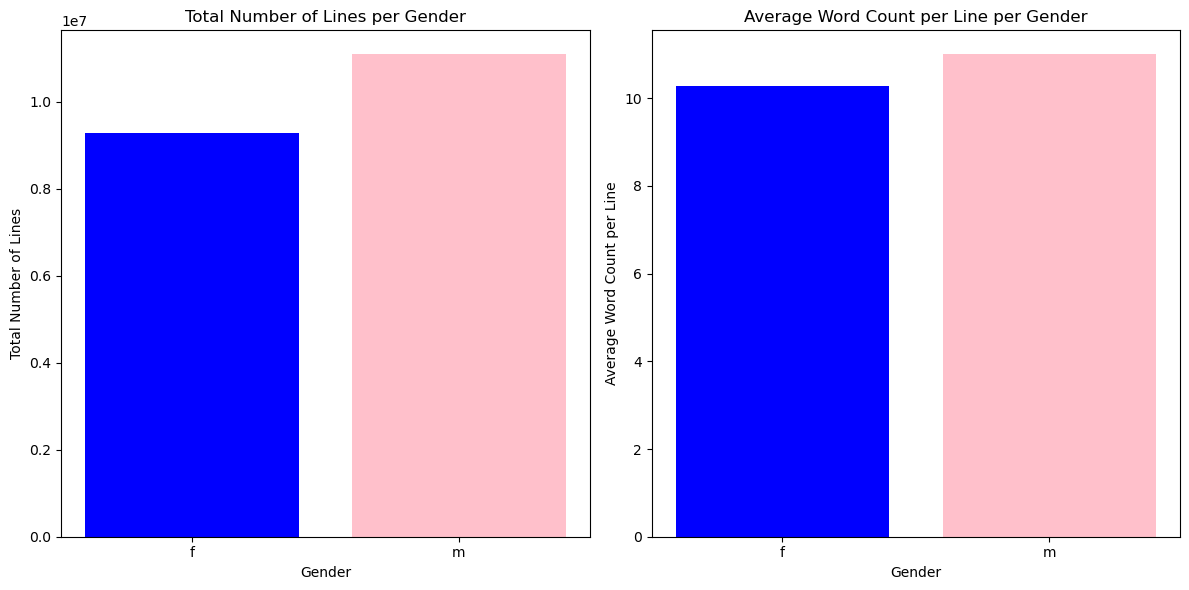

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming final_df is your DataFrame
# Calculate the total number of lines and the average word count per line for each gender
gender_stats = final_df.groupby('meta.gender').agg(
    total_lines=('line_count', 'sum'),
    avg_word_count=('wordCountLine', 'mean')
).reset_index()

# Display the DataFrame with statistics per gender
print(gender_stats)

# Create the plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the total number of lines per gender
axes[0].bar(gender_stats['meta.gender'], gender_stats['total_lines'], color=['blue', 'pink'])
axes[0].set_title('Total Number of Lines per Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Total Number of Lines')

# Plot the average word count per line per gender
axes[1].bar(gender_stats['meta.gender'], gender_stats['avg_word_count'], color=['blue', 'pink'])
axes[1].set_title('Average Word Count per Line per Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Average Word Count per Line')

# Show the plots
plt.tight_layout()
plt.show()

meta.gender          f      m
meta.credit_pos              
1                13367  27592
10+              12891  12219
2                22598   9911
3                 8745   7164
4                 5203   4251
5                 2401   3426
6                 2295   2528
7                 1288   1426
8                 1321   1432
9                 1146    819


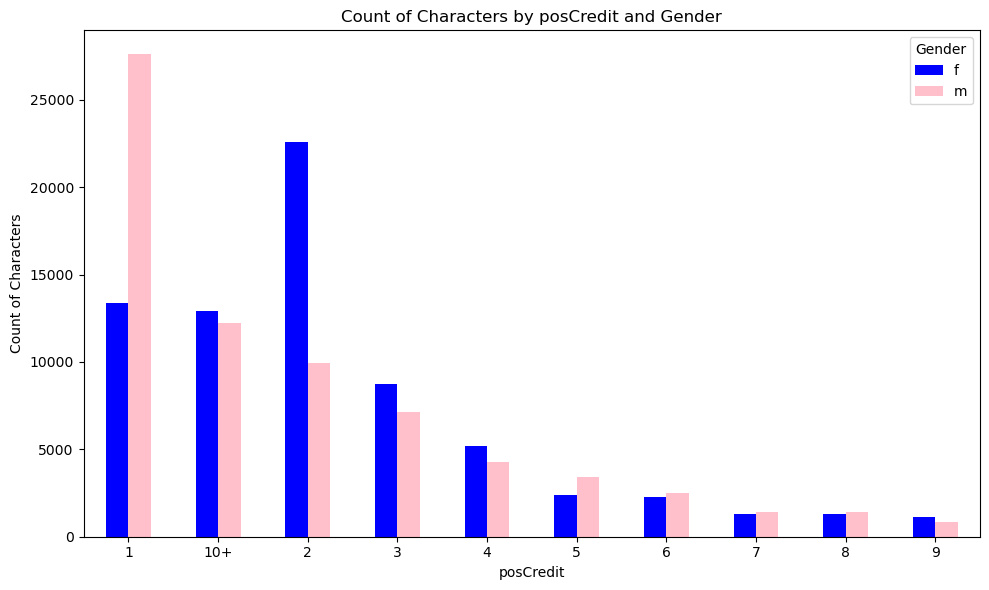

In [36]:
# Calculate the number of characters per posCredit and gender
posCredit_gender_counts = final_df.groupby(['meta.credit_pos', 'meta.gender']).size().unstack(fill_value=0)

# Visualise the DataFrame with the count per Credit and gender
print(posCredit_gender_counts)

# Plot the data
posCredit_gender_counts.plot(kind='bar', figsize=(10, 6), color=['blue', 'pink'])
plt.title('Count of Characters by posCredit and Gender')
plt.xlabel('posCredit')
plt.ylabel('Count of Characters')
plt.legend(title='Gender')
plt.xticks(rotation=0)  # Mantiene le etichette sull'asse x orizzontali
plt.tight_layout()
plt.show()

In [ ]:
# Distribution of movie genres
genre_counts = merged_df['meta.genre'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Ratings Distribution 
plt.figure(figsize=(30, 15))
sns.histplot(merged_df['meta.rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Conversations per movie to show some movies present more conversations than others
conversations_per_movie = merged_df['meta.movie_name'].value_counts()

plt.figure(figsize=(100,85))
sns.barplot(x=conversations_per_movie.index, y=conversations_per_movie.values)
plt.title('Number of Conversations per Movie')
plt.xlabel('Movie')
plt.ylabel('Number of Conversations')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Average rating per genre
average_rating_per_genre = merged_df.groupby('meta.genre')['meta.rating'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=average_rating_per_genre.index, y=average_rating_per_genre.values)
plt.title('Average Rating per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Conversations lenghts
conversation_lengths = merged_df['conversation_id'].value_counts()

plt.figure(figsize=(20, 12))
sns.histplot(conversation_lengths, bins=30, kde=True)
plt.title('Distribution of Conversation Lengths')
plt.xlabel('Number of Utterances per Conversation')
plt.ylabel('Frequency')
plt.show()


In [ ]:
merged_df['meta.genre'].isnull().sum()

In [37]:
from sklearn.preprocessing import LabelEncoder

# Creazione dell'istanza di LabelEncoder
label_encoder = LabelEncoder()

# Esempio di encoding della colonna 'meta.gender'
final_df['gender_encoded'] = label_encoder.fit_transform(final_df['meta.gender'])

# Visualizza l'associazione tra numeri e categorie
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(category_mapping)

{'f': 0, 'm': 1}


# Pre-pocessing

In [38]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Extend stopwords list
stop_words = set(stopwords.words('english'))
stop_words.update([',', '.', '?', ':', ';', "'", '“', '”', '!', '’', '...', '....', '--', '_'])

# Initialize lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

In [39]:
# Apply preprocessing
final_df['processed_text'] = final_df['text'].apply(preprocess_text)

# Pre - Models

Vectorization

In [40]:
# Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000) 
X_text = vectorizer.fit_transform(final_df['processed_text'])

Encoding

In [41]:
# Encoding the labels
le = LabelEncoder()
final_df['gender_label'] = le.fit_transform(final_df['meta.gender'])
y = final_df['gender_label']

In [42]:
# Apply LabelEncoder to meta.credit_pos
credit_pos_encoder = LabelEncoder()
final_df['encoded_credit_pos'] = credit_pos_encoder.fit_transform(final_df['meta.credit_pos'])

Train the Model

In [43]:
from scipy.sparse import hstack, csr_matrix

# Combine the text features with the other features
X_other = final_df[['line_count', 'encoded_credit_pos', 'medianLineLength', 'medianWordCountLine']]

# Convert X_other to a sparse matrix and combine with X_text
X_other_sparse = csr_matrix(X_other.values)
X_combined = hstack([X_text, X_other_sparse])


In [44]:
# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Naive Bayers

In [45]:
# Naive Bayers 
import time
# Start the timer for the entire process
start_time = time.time()
# Initialize the Multinomial Naive Bayes classifier
nb_clf = MultinomialNB()
# Train the classifier
nb_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

# Make predictions on the test set
nb_y_pred = nb_clf.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score of the model
accuracy = accuracy_score(y_test, nb_y_pred)
report = classification_report(y_test, nb_y_pred, target_names=le.classes_)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# End the timer for the entire process
end_time = time.time()

# Calculate the total elapsed time
total_time = end_time - start_time
print(f"Total Execution Time: {total_time} seconds")

Accuracy: 0.54
Classification Report:
               precision    recall  f1-score   support

           f       0.54      0.58      0.56     14280
           m       0.55      0.51      0.52     14125

    accuracy                           0.54     28405
   macro avg       0.54      0.54      0.54     28405
weighted avg       0.54      0.54      0.54     28405

Total Execution Time: 0.03877878189086914 seconds


# Logistic Regression

In [46]:
# Logistic full
import time
# Start the timer for the entire process
start_time = time.time()

# Logistic Regression classifier
lr_clr = LogisticRegression(solver = 'lbfgs', n_jobs=-1) 
lr_clr.fit(X_train, y_train)

# Predictions
lr_y_pred = lr_clr.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score of the model
accuracy = accuracy_score(y_test, lr_y_pred)
report = classification_report(y_test, lr_y_pred, target_names=le.classes_)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# End the timer for the entire process
end_time = time.time()

# Calculate the total elapsed time
total_time = end_time - start_time
print(f"Total Execution Time: {total_time} seconds")

Accuracy: 0.60
Classification Report:
               precision    recall  f1-score   support

           f       0.60      0.61      0.61     14280
           m       0.60      0.59      0.60     14125

    accuracy                           0.60     28405
   macro avg       0.60      0.60      0.60     28405
weighted avg       0.60      0.60      0.60     28405

Total Execution Time: 5.343806743621826 seconds


# SVM

In [47]:
'''
I haven't run this yet, might take too long

# svm model Johanna
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train, y_train)

# Predictions
svm_y_pred = svm.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score of the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)'''

'\nI haven\'t run this yet, might take too long\n\n# svm model Johanna\nfrom sklearn.svm import SVC\nsvm = SVC(kernel=\'linear\', C=1, random_state=42)\nsvm.fit(X_train, y_train)\n\n# Predictions\nsvm_y_pred = svm.predict(X_test)\n\n# Calculate accuracy, precision, recall, and F1-score of the model\naccuracy = accuracy_score(y_test, y_pred)\nreport = classification_report(y_test, y_pred, target_names=le.classes_)\n\nprint(f"Accuracy: {accuracy:.2f}")\nprint("Classification Report:\n", report)'

In [48]:
# Take a 1% sample of the dataset
sample_size = 0.20
df_sample = final_df.sample(frac=sample_size, random_state=42)

# Recreate the combined features for the sample
X_text_sample = vectorizer.transform(df_sample['processed_text'])
X_other_sample = df_sample[['line_count', 'medianWordCountLine', 'encoded_credit_pos', 'medianLineLength']]
X_other_sparse_sample = csr_matrix(X_other_sample.values)
X_combined_sample = hstack([X_text_sample, X_other_sparse_sample])
y_sample = df_sample['gender_label']

# Split the sample into 80% training and 20% testing sets
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_combined_sample, y_sample, test_size=0.2, random_state=42)

In [49]:
# SVM with PCA 50 components -- SAMPLE

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
import time
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Start the timer for the entire process
start_time = time.time()

# Define the PCA and SVM pipeline
pca = PCA(n_components=50)  # Preserve 95% of variance
svm = SVC(kernel='rbf', random_state=42)
pipeline = Pipeline([('pca', pca), ('svm', svm)])

# Define the parameter grid for GridSearch
param_grid = {'svm__C': [0.1, 1, 10, 100, 1000]}

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# GridSearchCV with parallelism
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, n_jobs=-1)
grid_search.fit(X_train_sample, y_train_sample)
execution_time = time.time() - start_time

# Best estimator
best_svm = grid_search.best_estimator_

# Predictions
svm_y_pred = best_svm.predict(X_test_sample)

# Evaluate the model
accuracy = accuracy_score(y_test_sample, svm_y_pred)
report = classification_report(y_test_sample, svm_y_pred, target_names=le.classes_)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# End the timer for the entire process
end_time = time.time()

# Calculate the total elapsed time
total_time = end_time - start_time
print(f"Total Execution Time: {total_time} seconds")

Accuracy: 0.65
Classification Report:
               precision    recall  f1-score   support

           f       0.63      0.73      0.68      2848
           m       0.68      0.57      0.62      2833

    accuracy                           0.65      5681
   macro avg       0.65      0.65      0.65      5681
weighted avg       0.65      0.65      0.65      5681

Total Execution Time: 119.3254714012146 seconds


In [50]:
'''# SVM without PCA with linear

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
import time

# Start the timer for the entire process
start_time = time.time()

# Define the SVM model
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=42)

# Define the parameter grid for GridSearch
param_grid = {'C': [0.1, 1, 10, 100, 1000]}

# GridSearchCV with parallelism
grid_search = GridSearchCV(svm, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train_sample, y_train_sample)

# Best estimator
best_svm = grid_search.best_estimator_

# Predictions
svm_y_pred = best_svm.predict(X_test_sample)

# Evaluate the model
accuracy = accuracy_score(y_test_sample, svm_y_pred)
report = classification_report(y_test_sample, svm_y_pred, target_names=le.classes_)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# End the timer for the entire process
end_time = time.time()

# Calculate the total elapsed time
total_time = end_time - start_time
print(f"Total Execution Time: {total_time} seconds")'''

'# SVM without PCA with linear\n\nfrom sklearn.model_selection import train_test_split, GridSearchCV\nfrom sklearn.svm import SVC\nimport time\n\n# Start the timer for the entire process\nstart_time = time.time()\n\n# Define the SVM model\nfrom sklearn.svm import SVC\nsvm = SVC(kernel=\'linear\', random_state=42)\n\n# Define the parameter grid for GridSearch\nparam_grid = {\'C\': [0.1, 1, 10, 100, 1000]}\n\n# GridSearchCV with parallelism\ngrid_search = GridSearchCV(svm, param_grid, cv=3, n_jobs=-1)\ngrid_search.fit(X_train_sample, y_train_sample)\n\n# Best estimator\nbest_svm = grid_search.best_estimator_\n\n# Predictions\nsvm_y_pred = best_svm.predict(X_test_sample)\n\n# Evaluate the model\naccuracy = accuracy_score(y_test_sample, svm_y_pred)\nreport = classification_report(y_test_sample, svm_y_pred, target_names=le.classes_)\n\nprint(f"Accuracy: {accuracy:.2f}")\nprint("Classification Report:\n", report)\n\n# End the timer for the entire process\nend_time = time.time()\n\n# Calculat

In [51]:
# SVM without PCA with rbg -- SAMPLE

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
import time

# Start the timer for the entire process
start_time = time.time()

# Define the SVM model
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=42)

# Define the parameter grid for GridSearch
param_grid = {'C': [0.1, 1, 10, 100, 1000]}

# GridSearchCV with parallelism
grid_search = GridSearchCV(svm, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train_sample, y_train_sample)

# Best estimator
best_svm = grid_search.best_estimator_

# Predictions
svm_y_pred = best_svm.predict(X_test_sample)

# Evaluate the model
accuracy = accuracy_score(y_test_sample, svm_y_pred)
report = classification_report(y_test_sample, svm_y_pred, target_names=le.classes_)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# End the timer for the entire process
end_time = time.time()

# Calculate the total elapsed time
total_time = end_time - start_time
print(f"Total Execution Time: {total_time} seconds")

Accuracy: 0.64
Classification Report:
               precision    recall  f1-score   support

           f       0.62      0.72      0.67      2848
           m       0.67      0.57      0.61      2833

    accuracy                           0.64      5681
   macro avg       0.64      0.64      0.64      5681
weighted avg       0.64      0.64      0.64      5681

Total Execution Time: 101.348459482193 seconds


# Random Forest 

In [53]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Start the timer for the entire process
start_time = time.time()

# Random Forest with all CPUs
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Predictions
rf_y_pred = rf.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score of the model
accuracy = accuracy_score(y_test, rf_y_pred)
report = classification_report(y_test, rf_y_pred, target_names=le.classes_)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# End the timer for the entire process
end_time = time.time()

# Calculate the total elapsed time
total_time = end_time - start_time
print(f"Total Execution Time: {total_time} seconds")

Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           f       0.91      0.94      0.92     14280
           m       0.94      0.90      0.92     14125

    accuracy                           0.92     28405
   macro avg       0.92      0.92      0.92     28405
weighted avg       0.92      0.92      0.92     28405

Total Execution Time: 10.954237222671509 seconds


# MLP CLassifier

In [63]:
# Take a 20% sample of the dataset
sample_size = 0.20
df_sample = final_df.sample(frac=sample_size, random_state=42)

# Recreate the combined features for the sample
X_text_sample = vectorizer.transform(df_sample['processed_text'])
X_other_sample = df_sample[['line_count', 'medianWordCountLine', 'encoded_credit_pos', 'medianLineLength']]
X_other_sparse_sample = csr_matrix(X_other_sample.values)
X_combined_sample = hstack([X_text_sample, X_other_sparse_sample])
y_sample = df_sample['gender_label']

# Split the sample into 80% training and 20% testing sets
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_combined_sample, y_sample, test_size=0.2, random_state=42)

In [64]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier
from joblib import parallel_backend

# Start the timer for the entire process
start_time = time.time()

# MLP Classifier with parallel backend
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Use joblib to parallelize the fit method
with parallel_backend('threading', n_jobs=-1):
    mlp.fit(X_train_sample, y_train_sample)

# Predictions
mlp_y_pred = mlp.predict(X_test_sample)


# Evaluate the model
accuracy = accuracy_score(y_test_sample, mlp_y_pred)
report = classification_report(y_test_sample, mlp_y_pred, target_names=le.classes_)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# End the timer for the entire process
end_time = time.time()

# Calculate the total elapsed time
total_time = end_time - start_time
print(f"Total Execution Time: {total_time} seconds")

Accuracy: 0.61
Classification Report:
               precision    recall  f1-score   support

           f       0.62      0.58      0.60      2848
           m       0.60      0.64      0.62      2833

    accuracy                           0.61      5681
   macro avg       0.61      0.61      0.61      5681
weighted avg       0.61      0.61      0.61      5681

Total Execution Time: 348.8934259414673 seconds


In [ ]:
'''
I haven't run this yet, It will take a lot :(

# MLP Classifier
from sklearn.neural_network import MLPClassifier
from joblib import parallel_backend

# MLP Classifier with parallel backend
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Use joblib to parallelize the fit method
with parallel_backend('threading', n_jobs=-1):
    mlp.fit(X_train, y_train)

# Predictions
mlp_y_pred = mlp.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score of the model
accuracy = accuracy_score(y_test, mlp_y_pred)
precision = precision_score(y_test, mlp_y_pred, average='weighted')
recall = recall_score(y_test, mlp_y_pred, average='weighted')
f1 = f1_score(y_test, mlp_y_pred, average='weighted')
print(f"Model Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")'''